Curso de
- Classificação: validação de modelos e métricas de avaliação (alura)

# Notebook de Treinamento e Anotações: Curso de Classificação com Machine Learning

Este notebook serviu como registro prático e teórico no meu aprendizado de ML no curso **`Classificação: Validação de Modelos e Métricas de Avaliação`** segundo da formação **`Machine Learning com Python: Classificação`**, oferecido pela plataforma **`Alura`**, cujo realizei. 

O Curso foca nas tecnicas de Validação Cruzada e Balanceamentos das bases de treino e teste. Durante o curso, são abordados os seguintes tópicos:

1. **Análise Exploratória de Dados**  
   - Exploração inicial para compreender as características e padrões presentes na base de dados.

2. **Modelo Decision Tree em dados com mais de duas classes**

3. **Divisão dos Dados em Conjuntos de Treino e Teste**  
   - Métodos para dividir os dados:
     - **Divisão Simples**: Separação direta dos dados em treino e teste.
     - **Divisão Estratificada**: Separação dos dados levando em conta as proporções das classes da variavel target.

4. **Treinamento do Modelo de Classificação**  
   - Construção e ajuste de modelos para prever as classes dos dados.

5. **Avaliação do Modelo**  
   - Utilização de métricas de desempenho e da Curva ROC (AUC) para avaliar a eficácia do modelo.

`Enriqueci este notebook com anotações adicionais e aplicações práticas que vão além do conteúdo abordado no curso, tornando-o uma referência valiosa para consultas e implementações em futuros projetos reais.`

Espero que este material inspire outros a explorar ainda mais o fascinante mundo do Machine Learning. 

Compartilhar conhecimento é uma alegria—viva ao aprendizado contínuo, boa pratica e bons estudo a quem estiver lendo, abraços!


# O presente notebook foca no aprendizado de tecnicas de validação cruzada e balanceamento em ML

# Funções, bibliotecas e Dataframe ficticios

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline

# Manipulação e Tratamento de dados
import openpyxl
import pandas as pd
import numpy as np
from numpy import NaN

#ignorando Warning inuteis
import warnings 
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
# Carregar os dados
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Identificar colunas a serem removidas # Remover colunas inúteis
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
df = df.drop(columns=columns_to_drop)
df = df.dropna()

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [4]:
colunas_cat = ['Pclass','Sex','Embarked']
for coluna in colunas_cat:
    df[coluna] = df[coluna].astype('O')

In [5]:
x = df.drop('Survived', axis=1)
y = df['Survived']

In [6]:
# DUMMYRIZAÇÃO
colunas_categoricas = []
colunas_binarias = []
colunas_mais3_categorias = []

for coluna in x.columns:
    if df[coluna].dtype == 'O':
        categorias = x[coluna].unique()
        if len(categorias) == 2:
            print('2 niveis:', coluna, '=>', categorias)
            colunas_categoricas.append(coluna)
            colunas_binarias.append(coluna)
        else:
            print('3 niveis:', coluna, '=>', categorias)
            colunas_categoricas.append(coluna)
            colunas_mais3_categorias.append(coluna)

############################################################################################
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder #transformando colunas com 2 categorias em 0 e 1

coluna = x.columns
one_hot = make_column_transformer((
    OneHotEncoder(drop='if_binary'), #caso a coluna tenha apenas 2 categorias 
    colunas_categoricas), #passando quais são essas colunas
    remainder = 'passthrough', sparse_threshold=0) #oque deve ser feito com as outras

#Aplicando transformação
x = one_hot.fit_transform(x)

#Os novos nomes das colunas #'onehotencoder=transformadas; 'remainder'=não transformadas
novos_nomes_colunas = one_hot.get_feature_names_out(coluna)

x = pd.DataFrame(x, columns = novos_nomes_colunas) #alterando de volta
x_columns = x.columns.tolist() 

############################################################################################
# NORMALIZAÇÃO
from sklearn.preprocessing import MinMaxScaler
normalizacao = MinMaxScaler()
x = normalizacao.fit_transform(x)

#df['Close_padronizada'] = (df[coluna] - df[coluna].mean()) / df[coluna].std()
#df['Close_normalizada'] = (df[coluna] - df[coluna].min()) / (df[coluna].max() - df[coluna].min())

############################################################################################
# DEFININDO A VARIAVEL DEPENDENTE
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)

############################################################################################
x_inteiro = x
y_inteiro = y

# DIVIDINDO BASE EM TREINO E TESTE
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, 
                                                    stratify = y, #para manter a proporção da Var Dep nos splits
                                                    random_state = 5) #raiz da aleatoridade
# test_size = 0.25 #porcentagem que ira ser separado para testes

print(x_treino.shape, x_teste.shape)
print(y_treino.shape, y_teste.shape)

3 niveis: Pclass => [3 1 2]
2 niveis: Sex => ['male' 'female']
3 niveis: Embarked => ['S' 'C' 'Q']
(534, 11) (178, 11)
(534,) (178,)


In [7]:
# Função para avaliação de modelos exibindo metricas de avaliação
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, RocCurveDisplay


def avaliar_modelo(y_verdadeiro, y_predito, conjunto_nome):
    """
    Função para avaliar e imprimir o relatório de classificação e a matriz de confusão.
    """
    #if conjunto_nome == "Treino":
     #   pass
    #else:
    print('*' * 70)
    print("Relatório de Classificação para o Conjunto de", conjunto_nome,":\n")
    print(classification_report(y_verdadeiro, y_predito))
    
    print('*' * 55)
    
    print("Matriz de Confusão para o Conjunto de", conjunto_nome,":\n")
    print(confusion_matrix(y_verdadeiro, y_predito))
    print('*' * 70)

    display(RocCurveDisplay.from_predictions(y_verdadeiro, y_predito, name = conjunto_nome))

###############################################################################################
# ou pode-se tbm carregar através de:
'''
import requests
arquivo = 'ML_supervised_learning'
url = "https://raw.githubusercontent.com/GabrielGabes/functions_gsa/main/" + arquivo + ".py"
response = requests.get(url)
code = response.text
exec(code)
'''


'\nimport requests\narquivo = \'ML_supervised_learning\'\nurl = "https://raw.githubusercontent.com/GabrielGabes/functions_gsa/main/" + arquivo + ".py"\nresponse = requests.get(url)\ncode = response.text\nexec(code)\n'

## Modelo Dummy Classifier

**********************************************************************
Relatório de Classificação para o Conjunto de Treino :

              precision    recall  f1-score   support

           0       0.60      1.00      0.75       318
           1       0.00      0.00      0.00       216

    accuracy                           0.60       534
   macro avg       0.30      0.50      0.37       534
weighted avg       0.35      0.60      0.44       534

*******************************************************
Matriz de Confusão para o Conjunto de Treino :

[[318   0]
 [216   0]]
**********************************************************************


**********************************************************************
Relatório de Classificação para o Conjunto de Teste :

              precision    recall  f1-score   support

           0       0.60      1.00      0.75       106
           1       0.00      0.00      0.00        72

    accuracy                           0.60       178
   macro avg       0.30      0.50      0.37       178
weighted avg       0.35      0.60      0.44       178

*******************************************************
Matriz de Confusão para o Conjunto de Teste :

[[106   0]
 [ 72   0]]
**********************************************************************


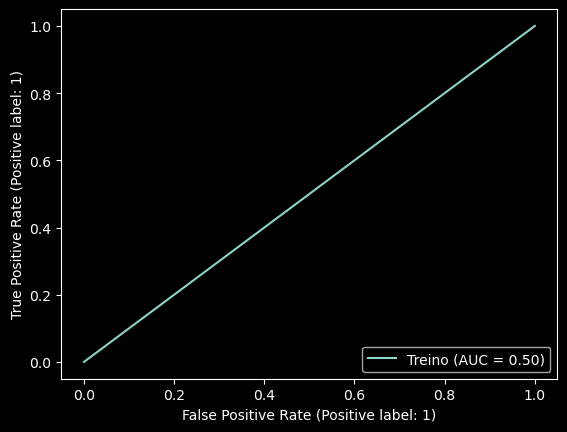

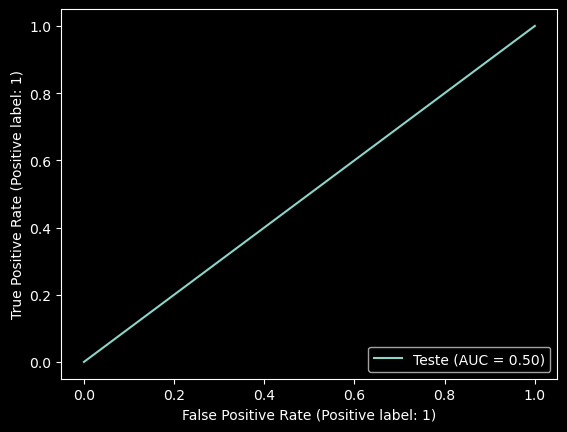

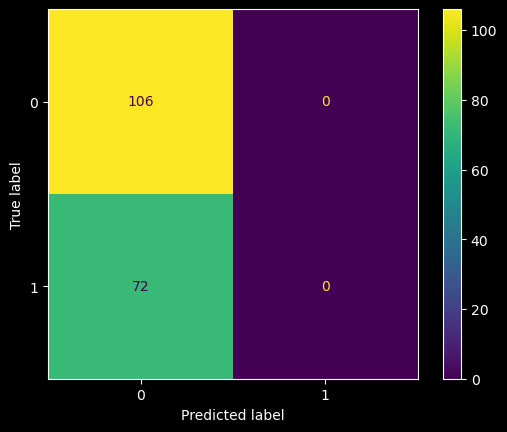

In [8]:
# MODELO BASE
from sklearn.dummy import DummyClassifier
classificador = DummyClassifier()

#######################################################################################
# Treinamento do Modelo
classificador.fit(x_treino, y_treino)

# Avaliação no conjunto de treino # Verificando Over/Under(Fitting)
previsoes_treino = classificador.predict(x_treino)
avaliar_modelo(y_treino, previsoes_treino, "Treino")

# Avaliação no conjunto de teste  # Relatório de classificação
previsoes = classificador.predict(x_teste)
avaliar_modelo(y_teste, previsoes, "Teste")

##############################
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matriz_confusao = confusion_matrix(y_teste, previsoes)
visualizacao = ConfusionMatrixDisplay(confusion_matrix= matriz_confusao)
visualizacao.plot();
#######################################################################################

## Decision Tree

**********************************************************************
Relatório de Classificação para o Conjunto de Treino :

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       318
           1       0.82      0.72      0.76       216

    accuracy                           0.82       534
   macro avg       0.82      0.80      0.81       534
weighted avg       0.82      0.82      0.82       534

*******************************************************
Matriz de Confusão para o Conjunto de Treino :

[[283  35]
 [ 61 155]]
**********************************************************************


**********************************************************************
Relatório de Classificação para o Conjunto de Teste :

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       106
           1       0.86      0.71      0.78        72

    accuracy                           0.84       178
   macro avg       0.84      0.82      0.82       178
weighted avg       0.84      0.84      0.83       178

*******************************************************
Matriz de Confusão para o Conjunto de Teste :

[[98  8]
 [21 51]]
**********************************************************************


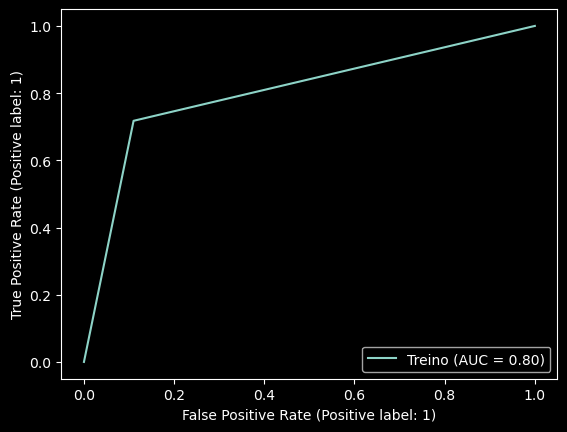

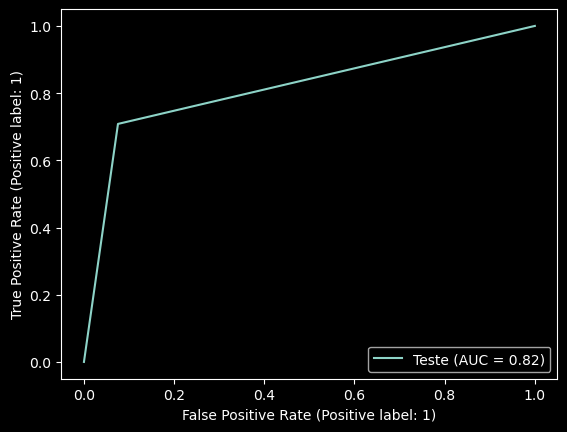

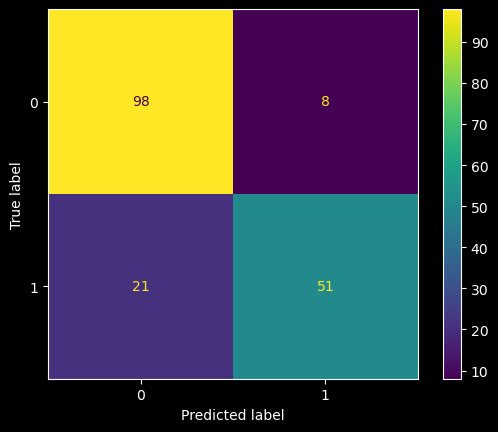

In [9]:
# APLICANDO MODELO
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

classificador = DecisionTreeClassifier(random_state=5, max_depth = 3)
#######################################################################################
# Treinamento do Modelo
classificador.fit(x_treino, y_treino)

# Avaliação no conjunto de treino # Verificando Over/Under(Fitting)
previsoes_treino = classificador.predict(x_treino)
avaliar_modelo(y_treino, previsoes_treino, "Treino")

# Avaliação no conjunto de teste  # Relatório de classificação
previsoes = classificador.predict(x_teste)
avaliar_modelo(y_teste, previsoes, "Teste")

##############################
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matriz_confusao = confusion_matrix(y_teste, previsoes)
visualizacao = ConfusionMatrixDisplay(confusion_matrix= matriz_confusao)
visualizacao.plot();
#######################################################################################

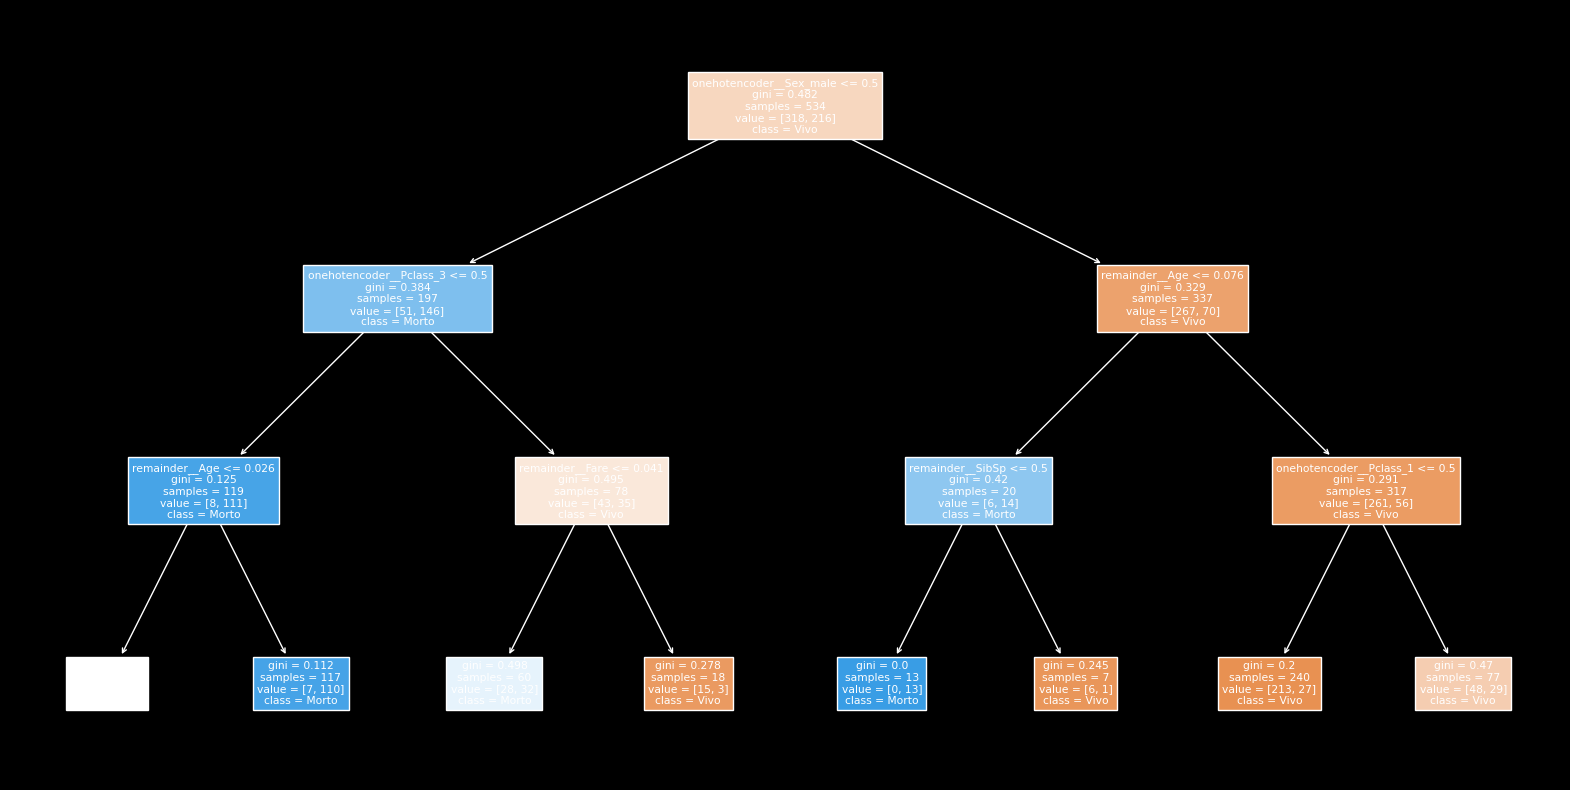

In [10]:
# Visualização da Árvore de Decisão
plt.figure(figsize=(20,10))

plot_tree(classificador, 
          filled = True, #Coloração das caixas do grafico
          class_names = ['Vivo', 'Morto'],
          feature_names=x_columns)

plt.show()

Text(0.5, 1.0, 'Importância dos Atributos')

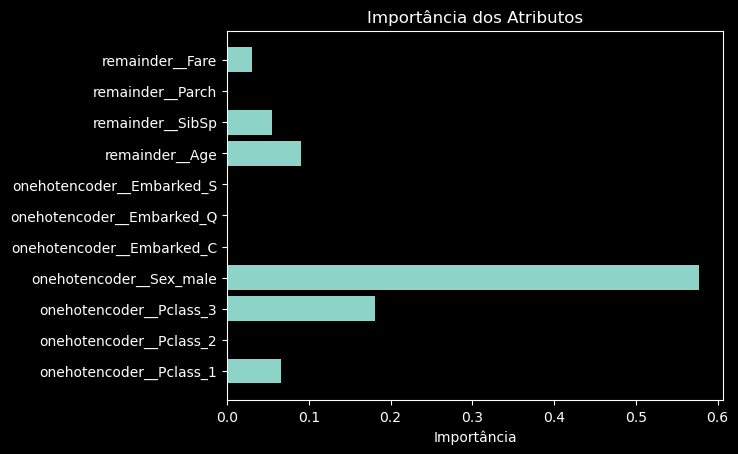

In [11]:
# Importância de Atributos
# Após ajustar o classificador ao seu conjunto de treino
importancias = classificador.feature_importances_
plt.barh(range(len(importancias)), importancias)
plt.yticks(range(len(x_columns)), x_columns)
plt.xlabel('Importância')
plt.title('Importância dos Atributos')

In [12]:
# SEPARANDO DADOS PARA TREINO E TESTE
from sklearn.model_selection import train_test_split
x, x_teste, y, y_teste = train_test_split(x, y, 
                                          #stratify = y, #para manter a proporção da Var Dep nos splits
                                          random_state = 5, #raiz da aleatoridade
                                          test_size = 0.25)
# test_size = 0.25 #porcentagem que ira ser separado para testes

x.shape, x_teste.shape, y.shape, y_teste.shape

((534, 11), (178, 11), (534,), (178,))

# =======================================

# Validação Cruzada

In [13]:
# PARA AVALIAR A VALIDAÇÃO CRUZADA
def intervalo_conf(resultados):
    media = resultados.mean()
    desvio_padrao = resultados.std()
    ic_0 = round(media - 2*desvio_padrao, 2)
    ic_1 = round(min(media + 2*desvio_padrao, 1), 2)
    ic = '[' + str(ic_0) + ' - ' + str(ic_1) + ']'
    return ic

def histograma(dados):
    dados = dados
    plt.figure(figsize=(15,5))
    plt.hist(dados, edgecolor='black', density=True) #bins=q_bins, 

    plt.title('hist', fontsize=15)
    plt.grid(True, color='gray')

    # Adicionar linhas verticais para média e mediana
    plt.axvline(x = dados.mean(), color='red', linestyle='--', label='Média')
    plt.axvline(x = dados.median(), color='blue', linestyle='--', label='Mediana')

    # Adicionar legenda personalizada
    texto_count = 'Count = ' + str(round(len(dados), 0))
    texto_media = 'Média = '+ str(round(dados.mean(), 2))
    texto_dp = 'DP = '+ str(round(dados.std(), 2))
    texto_min = 'Min = '+ str(round(dados.min(), 2))
    texto_Q1 = 'Q1 = ' + str(round(dados.quantile(0.25), 2))
    texto_mediana = 'Q2 = '+ str(round(dados.median(), 2))
    texto_Q3 = 'Q3 = ' + str(round(dados.quantile(0.75), 2))
    texto_max = 'Max = '+ str(round(dados.max(), 2))
    ic = 'IC ' + intervalo_conf(dados)
    texto_legenda = '\n'.join([texto_count, 
                               texto_min,
                               texto_media, texto_dp, 
                               texto_Q1, texto_mediana, texto_Q3,
                               texto_max, 
                               ic])

    plt.text(0.99, 0.96, texto_legenda, ha='right', va='top', transform=plt.gca().transAxes,
             bbox=dict(facecolor='black', edgecolor='gray', boxstyle='round'),
             fontsize=12)

    plt.show()

###############################################################################################
# ou pode-se tbm carregar através de:
'''
import requests
arquivo = 'funcoes_estatisticas'
url = "https://raw.githubusercontent.com/GabrielGabes/functions_gsa/main/" + arquivo + ".py"
response = requests.get(url)
code = response.text
exec(code)
'''


## KFolds

A validação cruzada \( k \)-folds é um método de validação de modelo usado para entender quão bem um modelo pode **generalizar** para um novo conjunto de dados (evitando sobreajuste - underfit). Esse método serve para garantir que o modelo não esteja apenas ajustado aos dados de treino, mas que realmente possa fazer previsões precisas sobre dados não vistos.

### Funcionamento

1. **Divisão do Conjunto de Dados:**
   O conjunto de dados é dividido aleatoriamente em \( k \) subconjuntos (ou "folds") de aproximadamente igual tamanho.

2. **Execução Iterativa:**
   O modelo é treinado e validado \( k \) vezes, com cada uma das \( k \) partes sendo usada exatamente uma vez como conjunto de teste, enquanto as \( k-1 \) partes restantes formam o conjunto de treino.

3. **Treinamento e Validação:**
   - Em cada iteração, o modelo é treinado com \( k-1 \) folds e testado no fold restante.
   - Isso permite que o modelo seja validado de maneira justa, utilizando todo o conjunto de dados para treino e teste ao longo das \( k \) iterações.

4. **Avaliação do Modelo:**
   - Após o treinamento, os resultados de cada fold são usados para estimar a eficácia do modelo, tipicamente através da média das métricas de desempenho (como precisão, recall, F1-score, etc.) obtidas em cada fold.

Ao escolher o valor de \( k \), um equilíbrio deve ser encontrado entre o custo computacional e a precisão da estimativa. Um valor comum é \( k=10 \), mas valores como \( k=5 \) ou \( k=20 \) também são usados dependendo do tamanho e da natureza do conjunto de dados.

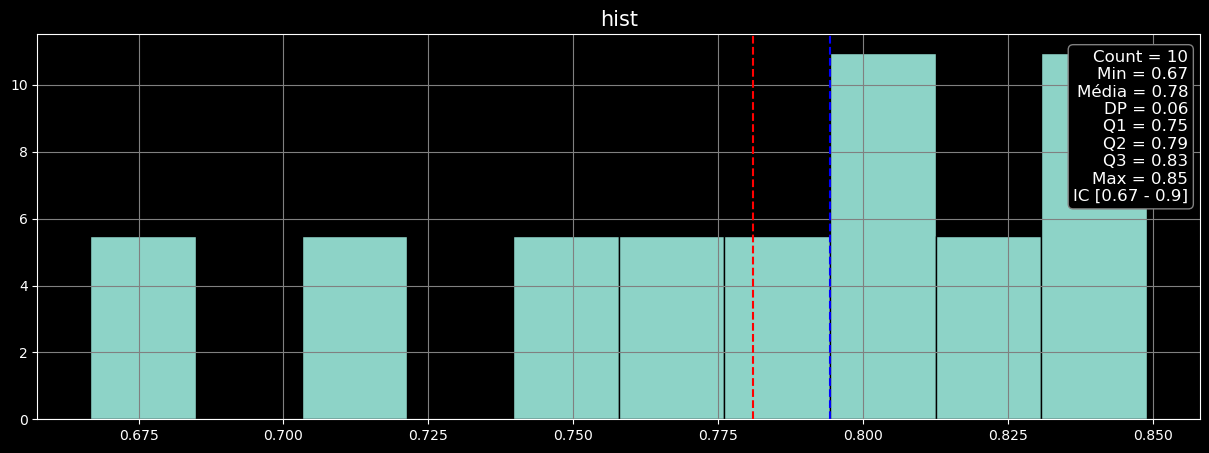

**********************************************************************
Relatório de Classificação para o Conjunto de Teste :

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       114
           1       0.69      0.72      0.70        64

    accuracy                           0.78       178
   macro avg       0.76      0.77      0.76       178
weighted avg       0.78      0.78      0.78       178

*******************************************************
Matriz de Confusão para o Conjunto de Teste :

[[93 21]
 [18 46]]
**********************************************************************


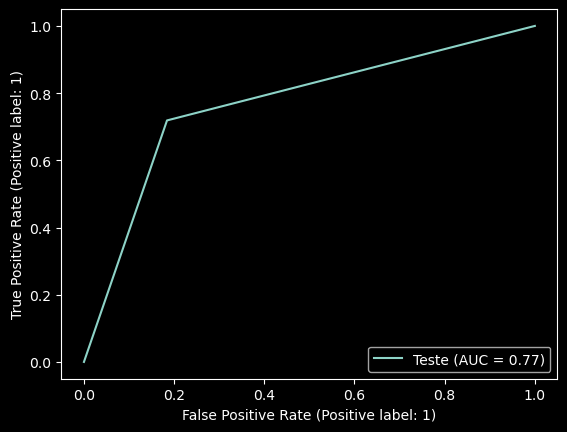

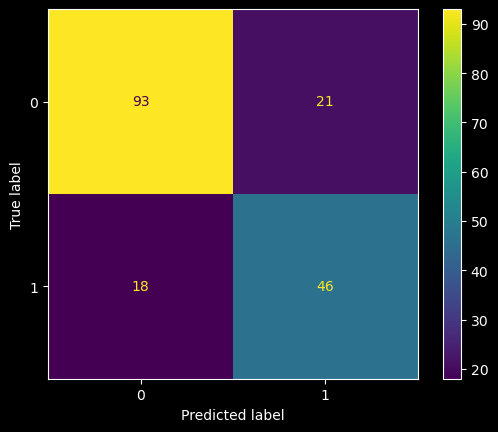

In [14]:
# VALIDAÇÃO CRUZADA
from sklearn.model_selection import cross_validate, KFold

classificador = DecisionTreeClassifier(max_depth = 10, random_state = 5)
kf = KFold(n_splits = 10, shuffle = True, random_state = 5)
cv_resultados = cross_validate(classificador, x, y, cv = kf)

cv_resultados = pd.DataFrame(cv_resultados['test_score'], columns=['test_score'])
histograma(cv_resultados['test_score'])

#######################################################################################
# Treinamento do Modelo
classificador.fit(x, y)

# Avaliação no conjunto de teste  # Relatório de classificação
previsoes = classificador.predict(x_teste)
avaliar_modelo(y_teste, previsoes, "Teste")

##############################
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matriz_confusao = confusion_matrix(y_teste, previsoes)
visualizacao = ConfusionMatrixDisplay(confusion_matrix= matriz_confusao)
visualizacao.plot();
#######################################################################################

## StratifiedKFold - Validação Cruzada Estratificada

`StratifiedKFold` é uma variação da validação cruzada \( k \)-folds que busca melhorar a representatividade das amostras em cada fold, especialmente útil em conjuntos de dados desbalanceados. Ao invés de dividir o conjunto de dados de forma completamente aleatória, este método divide os dados de forma que a proporção de cada classe seja preservada em cada fold.

- **Melhor Representatividade:** Reduz o risco de viés no treinamento e teste devido a amostras não representativas de cada classe.
- **Maior Confiança nos Resultados:** Ao garantir que todas as classes estejam adequadamente representadas, a validação cruzada estratificada oferece uma avaliação mais precisa e confiável do desempenho do modelo.

### Funcionamento

1. **Estratificação dos Dados:**
   Antes da divisão em \( k \) folds, o conjunto de dados é estratificado. Isso significa que a proporção de cada categoria de resposta (como "sim" ou "não" em uma variável binária) é mantida constante em cada fold.

2. **Execução Iterativa:**
   Como na validação cruzada \( k \)-folds, o modelo é treinado \( k \) vezes. Cada iteração usa um fold diferente como conjunto de teste, e os \( k-1 \) folds restantes como conjunto de treino.

3. **Treinamento e Validação:**
   - Em cada iteração, o modelo é treinado nos \( k-1 \) folds estratificados e validado no fold de teste.
   - Isso assegura que cada fold de teste é uma representação fiel da distribuição geral das classes, tornando os resultados do teste mais confiáveis.

4. **Avaliação do Modelo:**
   - A performance do modelo é avaliada em cada fold, utilizando métricas de desempenho adequadas para cada tipo de resposta. A média dessas métricas pode ser calculada para fornecer uma estimativa robusta da capacidade de generalização do modelo.

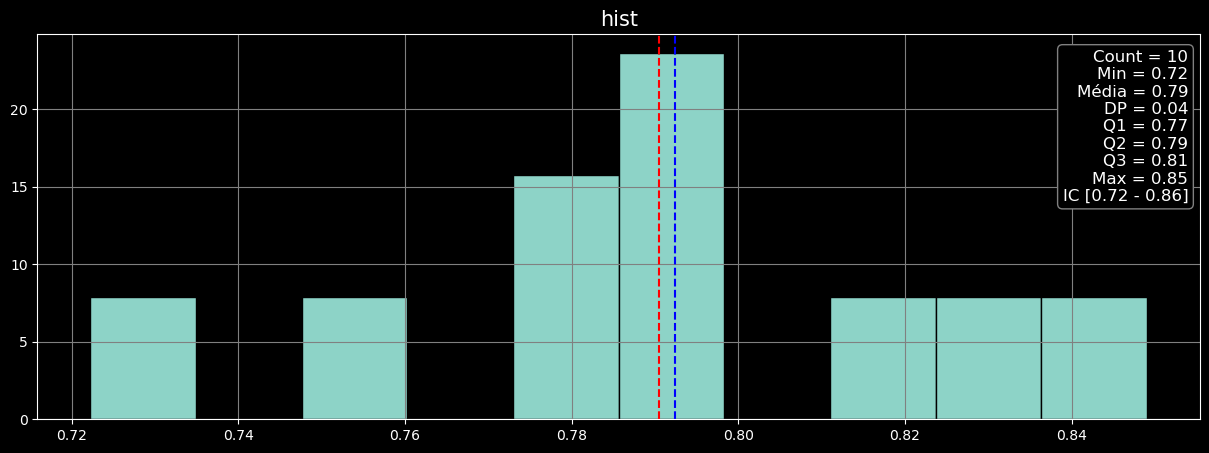

**********************************************************************
Relatório de Classificação para o Conjunto de Teste :

              precision    recall  f1-score   support

           0       0.80      0.96      0.87       114
           1       0.90      0.56      0.69        64

    accuracy                           0.82       178
   macro avg       0.85      0.76      0.78       178
weighted avg       0.83      0.82      0.81       178

*******************************************************
Matriz de Confusão para o Conjunto de Teste :

[[110   4]
 [ 28  36]]
**********************************************************************


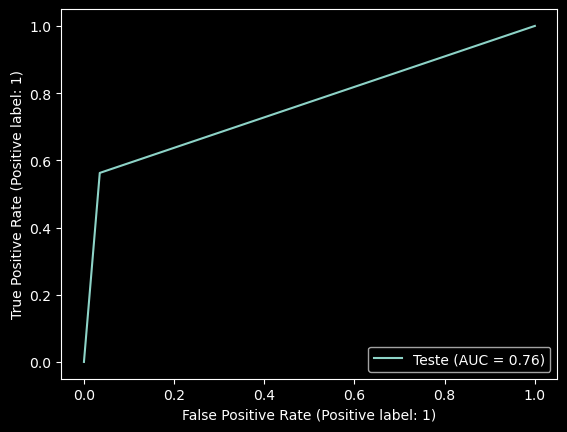

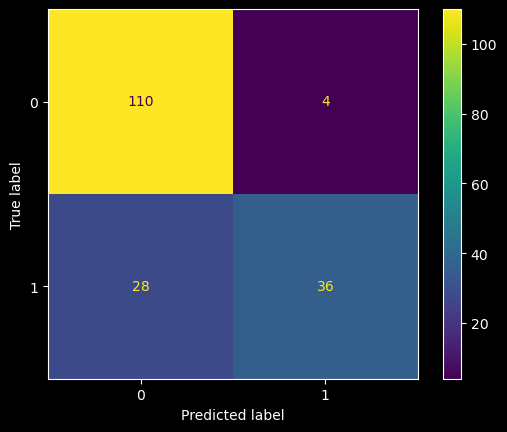

In [15]:
# VALIDAÇÃO CRUZADA ESTRATIFICADA
from sklearn.model_selection import StratifiedKFold

classificador = DecisionTreeClassifier(random_state=5, max_depth = 3)
skf = StratifiedKFold(n_splits = 10, 
                      shuffle = True, # embaralhamento dos dados
                      random_state = 5)
cv_resultados = cross_validate(classificador, x, y, cv = skf)

cv_resultados = pd.DataFrame(cv_resultados['test_score'], columns=['test_score'])
histograma(cv_resultados['test_score'])

#######################################################################################
# Treinamento do Modelo
classificador.fit(x, y)

# Avaliação no conjunto de teste  # Relatório de classificação
previsoes = classificador.predict(x_teste)
avaliar_modelo(y_teste, previsoes, "Teste")

##############################
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matriz_confusao = confusion_matrix(y_teste, previsoes)
visualizacao = ConfusionMatrixDisplay(confusion_matrix= matriz_confusao)
visualizacao.plot();
#######################################################################################

# Balanceamento de Dados

## Oversampling - SMOTE

Abordagem avançada de oversampling usada para balancear conjuntos de dados desbalanceados, aumentando a representatividade das classes minoritárias por meio da `criação de dados sintéticos`, ao invés de simplesmente replicar os exemplos existentes.

- **Diversificação:** Ao gerar novos exemplos, SMOTE introduz uma variedade maior no conjunto de dados, o que pode ajudar a evitar o overfitting que poderia ocorrer se simplesmente duplicássemos as amostras existentes.
- **Melhoria de Modelagem:** Com um balanceamento mais efetivo entre as classes, os modelos são capazes de aprender padrões mais generalizáveis, melhorando assim a precisão das previsões em dados não vistos.

SMOTE é amplamente utilizado em problemas de classificação onde o desequilíbrio de classes é significativo, como em detecção de fraude, diagnóstico médico e predição de falhas em equipamentos.

### Funcionamento

1. **Identificação das Amostras:**
   SMOTE analisa as características das amostras minoritárias (classe sub-representada) e identifica seus vizinhos mais próximos.

2. **Síntese de Novos Exemplos:**
   Para cada amostra na classe minoritária, são criados novos exemplos sintéticos. Isso é feito selecionando um dos \( k \) vizinhos mais próximos (geralmente \( k=5 \)) e interpolando um novo ponto entre a amostra original e o vizinho selecionado.

3. **Adição ao Conjunto de Dados:**
   Os exemplos sintéticos gerados são então adicionados ao conjunto de dados, aumentando a proporção da classe minoritária.

### Considerações

- **Espaço de Características:** SMOTE funciona bem quando as características são contínuas. Em dados categóricos, outras técnicas de oversampling, como o ADASYN (Adaptive Synthetic Sampling Approach), podem ser mais apropriadas.
- **Risco de Overfitting:** Apesar de introduzir diversidade, a criação de muitos exemplos sintéticos pode levar a um modelo excessivamente otimista em relação aos dados de treinamento. Deve-se ter cautela com o número de exemplos sintéticos gerados.

1    310
0    310
Name: count, dtype: int64
1    0.5
0    0.5
Name: proportion, dtype: float64


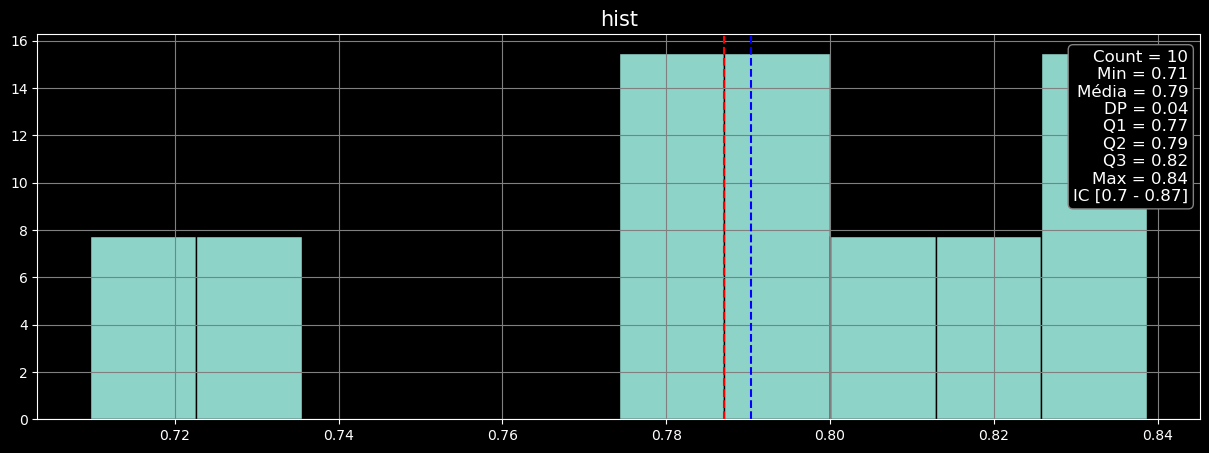

**********************************************************************
Relatório de Classificação para o Conjunto de Teste :

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       114
           1       0.71      0.73      0.72        64

    accuracy                           0.80       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.80      0.80      0.80       178

*******************************************************
Matriz de Confusão para o Conjunto de Teste :

[[95 19]
 [17 47]]
**********************************************************************


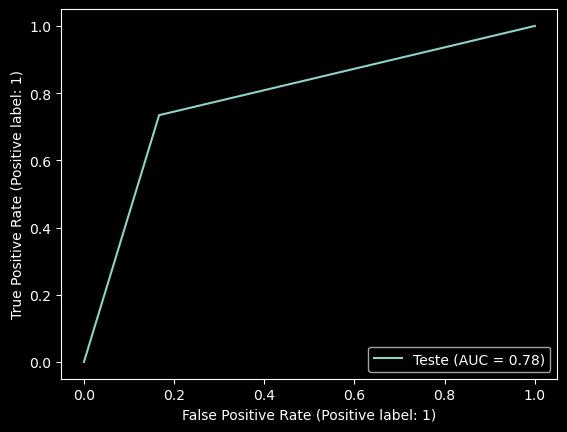

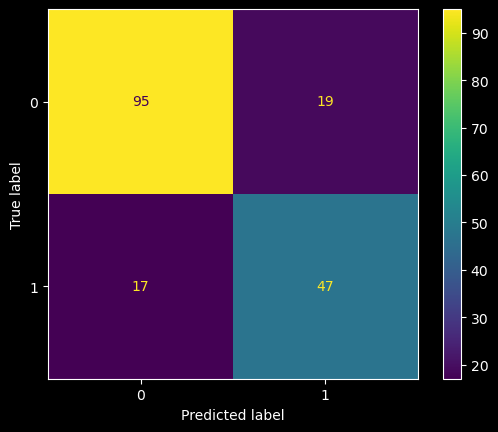

In [16]:
# BALANCEAMENTO DE DADOS - OVERSAMPLING
from imblearn.over_sampling import SMOTE

#criando dados sintéticos
oversample = SMOTE() 
x_balanceado, y_balanceado = oversample.fit_resample(x, y)

# checkando
print(pd.Series(y_balanceado).value_counts())
print(pd.Series(y_balanceado).value_counts(normalize = True))

#######################################################################################

#VALIDAÇÃO CRUZADA
classificador = DecisionTreeClassifier(max_depth = 10)
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
cv_resultados = cross_validate(classificador, x_balanceado, y_balanceado, cv = skf)

cv_resultados = pd.DataFrame(cv_resultados['test_score'], columns=['test_score'])
histograma(cv_resultados['test_score'])

#######################################################################################
# Treinamento do Modelo
classificador.fit(x_balanceado, y_balanceado)

# Avaliação no conjunto de teste  # Relatório de classificação
previsoes = classificador.predict(x_teste)
avaliar_modelo(y_teste, previsoes, "Teste")

##############################
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matriz_confusao = confusion_matrix(y_teste, previsoes)
visualizacao = ConfusionMatrixDisplay(confusion_matrix= matriz_confusao)
visualizacao.plot();
#######################################################################################

## Undersampling - NearMiss

Este método específico foca na `redução da classe majoritária`, mas com uma abordagem mais refinada que simplesmente remover amostras aleatoriamente. O NearMiss seleciona amostras da classe majoritária baseado em certos critérios de proximidade, com o objetivo de manter apenas aquelas que são mais representativas e/ou mais próximas das amostras da classe minoritária.

### Funcionamento

1. **Critérios de Seleção:**
   NearMiss implementa diferentes versões de seleção:
   - **NearMiss-1:** Seleciona amostras da classe majoritária com a menor distância média às três amostras mais próximas da classe minoritária.
   - **NearMiss-2:** Seleciona amostras da classe majoritária com a menor distância média às três amostras mais distantes da classe minoritária.
   - **NearMiss-3:** Um subconjunto da classe minoritária é selecionado primeiro, e então, para cada exemplo na classe minoritária, são retidas as \( n \) amostras mais próximas da classe majoritária.

2. **Redução da Classe Majoritária:**
   Amostras são selecionadas de acordo com o critério estabelecido até que o número de instâncias na classe majoritária seja reduzido suficientemente para igualar o da classe minoritária.

3. **Combinação de Dados:**
   As amostras da classe majoritária que atendem aos critérios são combinadas com as da classe minoritária para formar um novo conjunto de dados balanceado.

### Considerações

- **Perda de Informação Crítica:** Apesar da intenção de manter amostras importantes, a remoção de grandes quantidades de dados pode resultar em perda de informações cruciais.
- **Escolha do Método:** A escolha entre NearMiss-1, NearMiss-2, e NearMiss-3 pode ter um impacto significativo nos resultados, exigindo testes para determinar qual método se adapta melhor ao problema específico.

1    224
0    165
Name: count, dtype: int64
1    0.575835
0    0.424165
Name: proportion, dtype: float64


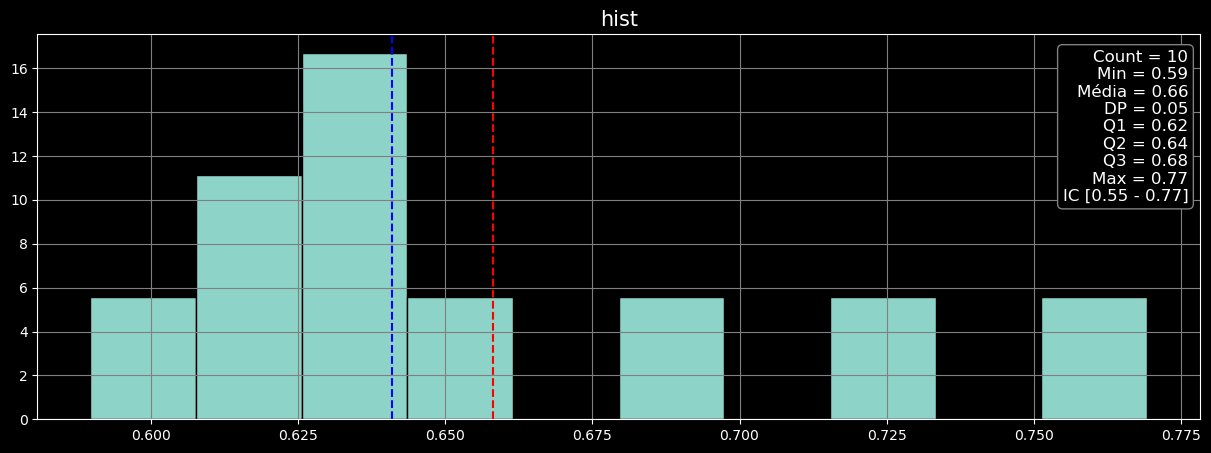

**********************************************************************
Relatório de Classificação para o Conjunto de Teste :

              precision    recall  f1-score   support

           0       0.83      0.75      0.79       114
           1       0.62      0.73      0.67        64

    accuracy                           0.74       178
   macro avg       0.73      0.74      0.73       178
weighted avg       0.76      0.74      0.75       178

*******************************************************
Matriz de Confusão para o Conjunto de Teste :

[[85 29]
 [17 47]]
**********************************************************************


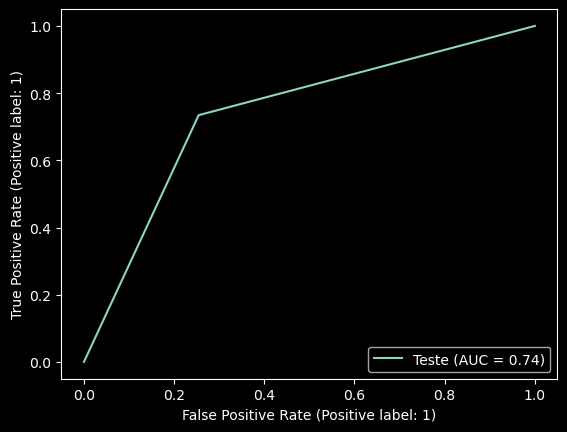

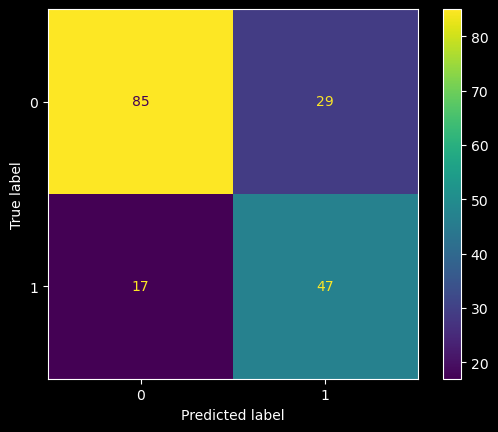

In [17]:
# BALANCEAMENTO DE DADOS - UNDERSAMPLING - NEARMISS
from imblearn.under_sampling import NearMiss

# reduzindo classe
undersample = NearMiss(version = 3)
x_balanceado, y_balanceado = undersample.fit_resample(x, y)

# checkando
print(pd.Series(y_balanceado).value_counts())
print(pd.Series(y_balanceado).value_counts(normalize = True))

#######################################################################################

#VALIDAÇÃO CRUZADA
classificador = DecisionTreeClassifier(max_depth = 10)
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
cv_resultados = cross_validate(classificador, x_balanceado, y_balanceado, cv = skf)

cv_resultados = pd.DataFrame(cv_resultados['test_score'], columns=['test_score'])
histograma(cv_resultados['test_score'])

#######################################################################################
# Treinamento do Modelo
classificador.fit(x_balanceado, y_balanceado)

# Avaliação no conjunto de teste  # Relatório de classificação
previsoes = classificador.predict(x_teste)
avaliar_modelo(y_teste, previsoes, "Teste")

##############################
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matriz_confusao = confusion_matrix(y_teste, previsoes)
visualizacao = ConfusionMatrixDisplay(confusion_matrix= matriz_confusao)
visualizacao.plot();
#######################################################################################

## Upsampling

Essa técnica envolve `aumentar a frequência da classe minoritária` para que ela se torne comparável à da classe majoritária, ajudando a melhorar a precisão e a eficácia dos modelos de classificação.

- **Simplicidade:** O upsampling é uma técnica direta e fácil de implementar para aumentar o número de exemplos de uma classe minoritária.
- **Efetividade:** Pode melhorar significativamente a performance de modelos de aprendizado de máquina em conjuntos de dados desbalanceados.

### Funcionamento

1. **Identificação da Classe Minoritária:**
   Primeiramente, identifica-se a classe que possui menos instâncias no conjunto de dados (classe minoritária).

2. **Replicação de Amostras:**
   Amostras da classe minoritária são replicadas aleatoriamente para aumentar sua representatividade. Isso pode ser feito até que o número de exemplos nessa classe seja igual ao da classe majoritária.

3. **Mistura com a Classe Majoritária:**
   As amostras replicadas são então misturadas de volta ao conjunto original, garantindo que a distribuição de classes seja mais equilibrada.

### Considerações

- **Risco de Overfitting:** A replicação de instâncias pode levar a um modelo que simplesmente memoriza os dados, ao invés de aprender padrões generalizáveis. Isso é particularmente problemático quando há pouca variação nas amostras replicadas.
- **Não Adiciona Novas Informações:** Como as amostras são apenas replicadas, nenhuma informação nova é introduzida ao modelo, o que pode limitar a capacidade do modelo de aprender nuances mais complexas das classes.
- **Combinação com Downsampling:** Frequentemente, o upsampling é combinado com o downsampling da classe majoritária para criar um equilíbrio ainda mais efetivo e evitar o aumento excessivo do conjunto de dados.


In [19]:
# checkando
pd.concat([pd.Series(y_inteiro).value_counts(), pd.Series(y_inteiro).value_counts(normalize = True)], axis=1)

,count,proportion
0,424,0.595506
1,288,0.404494


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# Separando por classe
x_inteiro_df = pd.DataFrame(x_inteiro)
y_inteiro_series = pd.Series(y_inteiro)
classe_maior = x_inteiro_df.iloc[sorted(y_inteiro_series[y_inteiro_series == 1].index)]
classe_menor = x_inteiro_df.iloc[sorted(y_inteiro_series[y_inteiro_series == 0].index)]

# Upsampling da classe minoritária
train_df_menor_upsampled = resample(classe_menor,
                                    replace=True,                # sample with replacement
                                    n_samples=len(classe_menor), # to match majority class
                                    random_state=123)            # reproducible results

# Combinando a classe majoritária com a classe minoritária upsampled
train_df_upsampled = pd.concat([classe_menor, train_df_menor_upsampled])

In [28]:
train_df_menor_upsampled.shape

(424, 11)

## Downsampling

Ao contrário do upsampling, que aumenta a frequência da classe minoritária, o downsampling `reduz a quantidade de amostras da classe majoritária` para igualar à da classe minoritária, criando um equilíbrio, tentando minimizar o viés do modelo em favor dessa classe e potencialmente melhorando a performance de modelos de classificação. 

### Funcionamento

1. **Identificação da Classe Majoritária:**
   A primeira etapa é identificar a classe que possui mais instâncias, conhecida como classe majoritária.

2. **Redução de Amostras:**
   Amostras da classe majoritária são aleatoriamente removidas do conjunto de dados até que o número de instâncias seja equivalente ao da classe minoritária.

3. **Reintegração ao Conjunto de Dados:**
   As amostras restantes da classe majoritária são combinadas com as da classe minoritária, resultando em um conjunto de dados mais balanceado.

### Considerações

- **Perda de Informação:** A remoção de amostras pode resultar na perda de informações importantes, potencialmente prejudicando a capacidade do modelo de aprender a generalizar a partir de dados reais.
- **Escolha de Amostras:** A seleção aleatória de amostras para remoção pode não ser a abordagem ideal; métodos mais sofisticados podem ser necessários para preservar a integridade da informação.
- **Combinação com Upsampling:** Muitas vezes, o downsampling é usado em conjunto com o upsampling para não apenas reduzir a classe majoritária, mas também aumentar a minoritária, alcançando um equilíbrio ideal.
- **Técnicas Avançadas:** Métodos como clustering ou análises de importância de instâncias podem ser utilizados para escolher quais amostras remover, assegurando que as mais representativas e informativas sejam mantidas.